In [6]:
import pandas as pd

CREATE OBJECT OF CSV FILE AS DATA FRAME, ALTERNATELY CAN IMPORT AS JSON AS WELL as shown

In [7]:
#import json
#jdf=pd.read_json("test.json",lines=True)
#jdf

In [8]:
df =pd.read_csv("test.csv")

## find current surges and replace

In [9]:
df

,Id,Voltage1,Current1,Active_Power1,Power_Factor1,Frequency1,Voltage2,Current2,Active_Power2,Power_Factor2,Frequency2,Voltage3,Current3,Active_Power3,Power_Factor3,Frequency3
0,368249,220.08,0.64,126,0.70,50.00,280.08,0.64,126,0.70,50.00,280.08,0.64,126,0.70,50.00
1,368249,222.00,0.64,127,0.70,50.00,280.09,0.64,127,0.70,50.00,280.09,0.64,127,0.70,50.00
2,368249,225.00,0.64,126,0.70,50.00,280.08,0.64,126,0.70,50.00,280.08,0.64,126,0.70,50.00
3,368249,230.00,0.65,127,0.70,50.00,280.14,0.65,127,0.70,50.00,280.14,0.65,127,0.70,50.00
4,368249,280.12,0.64,126,0.70,50.00,280.12,0.64,126,0.70,50.00,280.12,0.64,126,0.70,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,368249,279.26,0.75,147,0.70,49.95,279.26,0.75,147,0.70,49.95,279.26,0.75,147,0.70,49.95
438,368249,279.31,0.72,141,0.70,49.95,279.31,0.72,141,0.70,49.95,279.31,0.72,141,0.70,49.95
439,368249,279.34,0.69,135,0.71,49.94,279.34,0.69,135,0.71,49.94,279.34,0.69,135,0.71,49.94
440,368249,279.32,0.68,133,0.71,49.94,279.32,0.68,133,0.71,49.94,279.32,0.68,133,0.71,49.94


## DERIVE PARAMETERS FROM THE DATA FRAME

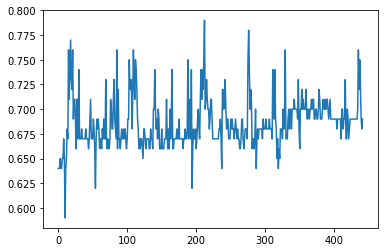

In [10]:
df["Current1"].plot()

HISTOGRAM DISTRIBUTION SHOWS THE CURRENT DISTRIBUTION

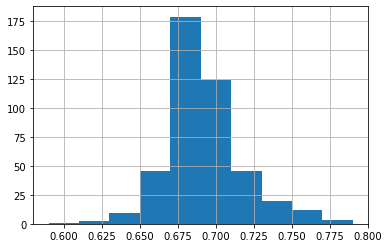

In [11]:
df["Current1"].hist()

In [12]:
df_param=df.describe()

In [13]:
df_param

,Id,Voltage1,Current1,Active_Power1,Power_Factor1,Frequency1,Voltage2,Current2,Active_Power2,Power_Factor2,Frequency2,Voltage3,Current3,Active_Power3,Power_Factor3,Frequency3
count,442.0,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,368249.0,278.261923,0.686606,134.662896,0.702896,49.951335,279.433032,0.686606,134.662896,0.702896,49.951335,279.433032,0.686606,134.662896,0.702896,49.951335
std,0.0,7.820339,0.025355,4.874100,0.004541,0.022483,0.235203,0.025355,4.874100,0.004541,0.022483,0.235203,0.025355,4.874100,0.004541,0.022483
min,368249.0,220.080000,0.590000,116.000000,0.700000,49.920000,278.570000,0.590000,116.000000,0.700000,49.920000,278.570000,0.590000,116.000000,0.700000,49.920000
25%,368249.0,279.270000,0.670000,131.000000,0.700000,49.930000,279.280000,0.670000,131.000000,0.700000,49.930000,279.280000,0.670000,131.000000,0.700000,49.930000
50%,368249.0,279.370000,0.680000,134.000000,0.700000,49.940000,279.380000,0.680000,134.000000,0.700000,49.940000,279.380000,0.680000,134.000000,0.700000,49.940000
75%,368249.0,279.530000,0.700000,138.000000,0.710000,49.960000,279.550000,0.700000,138.000000,0.710000,49.960000,279.550000,0.700000,138.000000,0.710000,49.960000
max,368249.0,290.100000,0.790000,153.000000,0.710000,50.000000,280.170000,0.790000,153.000000,0.710000,50.000000,280.170000,0.790000,153.000000,0.710000,50.000000


## 25TH & 75TH Percentile shows the maximum value upto that point.
## using the standard deviation,25th Percentile & 75th percentile we will derive the lower and upper current value 

In [14]:
i_25=df_param.iat[4,2]

In [15]:
i_75=df_param.iat[6,2]

In [16]:
i_std=df_param.iat[2,2]

In [17]:
error_min=i_25-i_std

In [18]:
error_max=i_75+i_std

## THE CURRENT BOUNDS ARE DERIVED AS

In [19]:
error_min

0.6446449474475499

In [20]:
error_max

0.7253550525524501

## FIND THE INDEX OF VAUES THAT ARE OUT OF THE DESIRED RANGE

In [21]:
error_index_gt=df.index[df['Current1']>error_max].tolist()


In [22]:
error_index_lt=df.index[df['Current1']<error_min].tolist()

In [23]:
errors=error_index_gt+error_index_lt
errors

[15,
 17,
 18,
 19,
 21,
 30,
 69,
 81,
 85,
 103,
 106,
 109,
 110,
 112,
 113,
 140,
 165,
 188,
 193,
 207,
 209,
 211,
 212,
 215,
 242,
 275,
 276,
 277,
 311,
 314,
 329,
 348,
 416,
 435,
 437,
 0,
 1,
 2,
 4,
 5,
 10,
 11,
 54,
 194,
 237,
 287,
 319]

In [24]:
len(errors)

47

In [25]:
l=len(df)

In [26]:
z1=0
z2=0

## REPLACE THE VALUES AT THESE INDEX WITH THE AVERAGE VALUES FROM NEIGHBORING SAMPLES

In [27]:
for x in errors:
    if (x>=4) and (x<=(l-4)):
        y0=df.iat[x-4,2]
        #print(y0)
        y1=df.iat[x-3,2]
        #print(y1)
        y2=df.iat[x-2,2]
        #print(y2)
        y3=df.iat[x-1,2]
        #print(y3)
        z1=(y0+y1+y2+y3)/4
        y5=df.iat[x+1,2]
        #print(y5)
        y6=df.iat[x+2,2]
        #print(y6)
        y7=df.iat[x+3,2]
        #print(y7)
        y8=df.iat[x+4,2]
        #print(y8)
        z2=(y5+y6+y7+y8)/4
        y=(z1+z2)/2
        
    if x<4:
        y0=df.iat[x+4,2]
        #print(y0)
        y1=df.iat[x+3,2]
        #print(y1)
        y2=df.iat[x+2,2]
        #print(y2)
        y3=df.iat[x+1,2]
        #print(y3)
        y=(y0+y1+y2+y3)/4
        #print(y)
    if x>(l-4):
        y0=df.iat[x-4,2]
        #print(y0)
        y1=df.iat[x-3,2]
        #print(y1)
        y2=df.iat[x-2,2]
        #print(y2)
        y3=df.iat[x-1,2]
        #print(y3)
        y=(y0+y1+y2+y3)/4
        #print(y)
        
    df.loc[x,'Current1']=y

In [28]:
df.describe()

,Id,Voltage1,Current1,Active_Power1,Power_Factor1,Frequency1,Voltage2,Current2,Active_Power2,Power_Factor2,Frequency2,Voltage3,Current3,Active_Power3,Power_Factor3,Frequency3
count,442.0,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,368249.0,278.261923,0.683681,134.662896,0.702896,49.951335,279.433032,0.686606,134.662896,0.702896,49.951335,279.433032,0.686606,134.662896,0.702896,49.951335
std,0.0,7.820339,0.017459,4.874100,0.004541,0.022483,0.235203,0.025355,4.874100,0.004541,0.022483,0.235203,0.025355,4.874100,0.004541,0.022483
min,368249.0,220.080000,0.642500,116.000000,0.700000,49.920000,278.570000,0.590000,116.000000,0.700000,49.920000,278.570000,0.590000,116.000000,0.700000,49.920000
25%,368249.0,279.270000,0.670000,131.000000,0.700000,49.930000,279.280000,0.670000,131.000000,0.700000,49.930000,279.280000,0.670000,131.000000,0.700000,49.930000
50%,368249.0,279.370000,0.680000,134.000000,0.700000,49.940000,279.380000,0.680000,134.000000,0.700000,49.940000,279.380000,0.680000,134.000000,0.700000,49.940000
75%,368249.0,279.530000,0.700000,138.000000,0.710000,49.960000,279.550000,0.700000,138.000000,0.710000,49.960000,279.550000,0.700000,138.000000,0.710000,49.960000
max,368249.0,290.100000,0.723750,153.000000,0.710000,50.000000,280.170000,0.790000,153.000000,0.710000,50.000000,280.170000,0.790000,153.000000,0.710000,50.000000


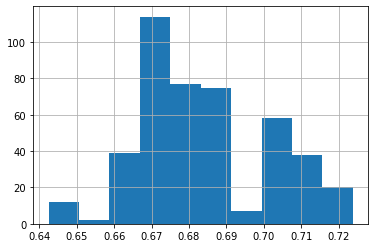

In [29]:
df["Current1"].hist()

## COMPARING THE CURRENT DISTRIBUTION

![Before](download.png)

![after](download2.png)

## EXPORT TO JSON FILE

In [30]:
df.to_json (r'corrected.json')

## CAN DO THIS BY CALLING A FUNCTION... AND PASSING THE DATAFRAME THAT NEEDS TO BE CORRECTED 

In [34]:
import pandas as pd
import json
df = pd.read_json("test.json",lines=True)
def val_correct (df_test):
    name = df_test.name
    if name== 'Voltage1':
        n=1
    elif name== 'Current1':
        n=2
    elif name== 'Power_Factor1':
        n=4
    elif name== 'Frequency1':
        n=5
    else:
        print("No correction criteria found")
    df_param=df.describe()
    n_25 = df_param.iat[4,n]
    n_75 = df_param.iat[6,n]
    n_std = df_param.iat[2,n]
    error_min=n_25-n_std
    error_max=n_75+n_std
    error_index_gt=df.index[df[name]>error_max].tolist()
    error_index_lt=df.index[df[name]<error_min].tolist()
    errors=error_index_gt+error_index_lt
    l=len(df)
    for x in errors:
        if (x>=4) and (x<=(l-5)):
            y0=df.iat[x-4,n]
            y1=df.iat[x-3,n]
            y2=df.iat[x-2,n]
            y3=df.iat[x-1,n]
            y5=df.iat[x+1,n]
            y6=df.iat[x+2,n]
            y7=df.iat[x+3,n]
            y8=df.iat[x+4,n]
            y=(y1+y2+y3+y0+y5+y6+y7+y8)/8
        if x<4:
            y0=df.iat[x+4,n]
            y1=df.iat[x+3,n]
            y2=df.iat[x+2,n]
            y3=df.iat[x+1,n]
            y=(y0+y1+y2+y3)/4
        if x>(l-5):
            y0=df.iat[x-4,n]
            y1=df.iat[x-3,n]
            y2=df.iat[x-2,n]
            y3=df.iat[x-1,n]
            y=(y0+y1+y2+y3)/4
        df.loc[x,name]=y
    df.to_json (r'corrected.json')
    df[name].plot()
    print("Values Corrected")
    return

In [35]:
df

,Id,Voltage1,Current1,Active_Power1,Power_Factor1,Frequency1,Voltage2,Current2,Active_Power2,Power_Factor2,Frequency2,Voltage3,Current3,Active_Power3,Power_Factor3,Frequency3,Time_Stamp3
0,368249,280.08,0.64,126,0.70,50.00,280.08,0.64,126,0.70,50.00,280.08,0.64,126,0.70,50.00,"2020-8-3,0:19:27.822"
1,368249,280.09,0.64,127,0.70,50.00,280.09,0.64,127,0.70,50.00,280.09,0.64,127,0.70,50.00,"2020-8-3,0:19:25.345"
2,368249,280.08,0.64,126,0.70,50.00,280.08,0.64,126,0.70,50.00,280.08,0.64,126,0.70,50.00,"2020-8-3,0:19:24.18"
3,368249,280.14,0.65,127,0.70,50.00,280.14,0.65,127,0.70,50.00,280.14,0.65,127,0.70,50.00,"2020-8-3,0:19:23.691"
4,368249,280.12,0.64,126,0.70,50.00,280.12,0.64,126,0.70,50.00,280.12,0.64,126,0.70,50.00,"2020-8-3,0:19:21.365"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21973,368249,277.78,0.82,163,0.71,49.96,277.78,0.82,163,0.71,49.96,277.78,0.82,163,0.71,49.96,"2020-8-2,14:35:12.437"
21974,368249,277.85,0.81,161,0.71,49.96,277.85,0.81,161,0.71,49.96,277.85,0.81,161,0.71,49.96,"2020-8-2,14:35:11.107"
21975,368249,277.78,0.87,169,0.71,49.96,277.78,0.87,169,0.71,49.96,277.78,0.87,169,0.71,49.96,"2020-8-2,14:35:9.776"
21976,368249,277.75,0.84,166,0.71,49.95,277.75,0.84,166,0.71,49.95,277.75,0.84,166,0.71,49.95,"2020-8-2,14:35:8.446"


Values Corrected


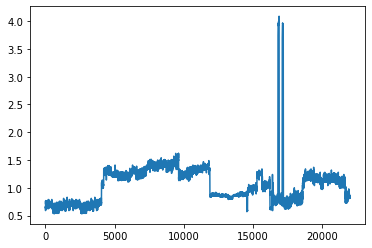

In [36]:
val_correct(df['Current1']);

Values Corrected


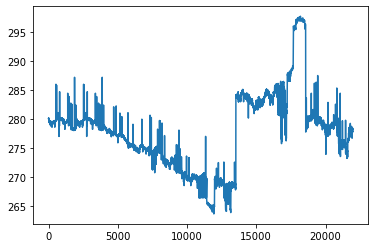

In [37]:
val_correct(df['Voltage1']);

Values Corrected


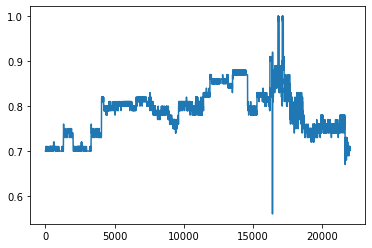

In [38]:
val_correct(df['Power_Factor1']);

Values Corrected


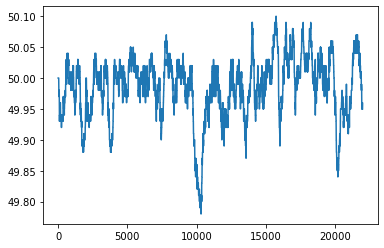

In [39]:
val_correct(df['Frequency1']);

In [40]:
df.describe()

,Id,Voltage1,Current1,Active_Power1,Power_Factor1,Frequency1,Voltage2,Current2,Active_Power2,Power_Factor2,Frequency2,Voltage3,Current3,Active_Power3,Power_Factor3,Frequency3
count,21978.0,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000
mean,368249.0,277.687754,1.046249,230.704295,0.789774,49.984962,277.683837,1.050237,230.704295,0.788244,50.012510,277.683837,1.050237,230.704295,0.788244,50.012510
std,0.0,6.613146,0.360997,96.082335,0.053229,0.049756,7.127780,0.569720,96.082335,0.232547,4.083716,7.127780,0.569720,96.082335,0.232547,4.083716
min,368249.0,263.620776,0.530000,-1.000000,0.560000,49.780000,258.750000,0.530000,-1.000000,-32.770000,49.780000,258.750000,0.530000,-1.000000,-32.770000,49.780000
25%,368249.0,273.520000,0.800000,183.000000,0.750000,49.960000,273.520000,0.800000,183.000000,0.750000,49.960000,273.520000,0.800000,183.000000,0.750000,49.960000
50%,368249.0,278.290000,1.080000,234.000000,0.800000,49.990000,278.290000,1.080000,234.000000,0.800000,49.990000,278.290000,1.080000,234.000000,0.800000,49.990000
75%,368249.0,280.440000,1.250000,276.000000,0.820000,50.020000,280.440000,1.250000,276.000000,0.820000,50.020000,280.440000,1.250000,276.000000,0.820000,50.020000
max,368249.0,297.707596,4.088778,1157.000000,1.000000,50.100000,655.350000,65.540000,1157.000000,1.000000,655.350000,655.350000,65.540000,1157.000000,1.000000,655.350000


### 655 Data

In [49]:
import pandas as pd

In [50]:
import json

In [51]:
df=pd.read_json('test.json',lines=True)

In [52]:
import sys

In [53]:
sys.path.append("/")

In [54]:
import Data_Correction as dc

In [55]:
df=pd.read_json('test.json',lines=True)

In [56]:
df.describe()

,Id,Voltage1,Current1,Active_Power1,Power_Factor1,Frequency1,Voltage2,Current2,Active_Power2,Power_Factor2,Frequency2,Voltage3,Current3,Active_Power3,Power_Factor3,Frequency3
count,21978.0,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000
mean,368249.0,277.683837,1.050237,230.704295,0.788244,50.012510,277.683837,1.050237,230.704295,0.788244,50.012510,277.683837,1.050237,230.704295,0.788244,50.012510
std,0.0,7.127780,0.569720,96.082335,0.232547,4.083716,7.127780,0.569720,96.082335,0.232547,4.083716,7.127780,0.569720,96.082335,0.232547,4.083716
min,368249.0,258.750000,0.530000,-1.000000,-32.770000,49.780000,258.750000,0.530000,-1.000000,-32.770000,49.780000,258.750000,0.530000,-1.000000,-32.770000,49.780000
25%,368249.0,273.520000,0.800000,183.000000,0.750000,49.960000,273.520000,0.800000,183.000000,0.750000,49.960000,273.520000,0.800000,183.000000,0.750000,49.960000
50%,368249.0,278.290000,1.080000,234.000000,0.800000,49.990000,278.290000,1.080000,234.000000,0.800000,49.990000,278.290000,1.080000,234.000000,0.800000,49.990000
75%,368249.0,280.440000,1.250000,276.000000,0.820000,50.020000,280.440000,1.250000,276.000000,0.820000,50.020000,280.440000,1.250000,276.000000,0.820000,50.020000
max,368249.0,655.350000,65.540000,1157.000000,1.000000,655.350000,655.350000,65.540000,1157.000000,1.000000,655.350000,655.350000,65.540000,1157.000000,1.000000,655.350000


c:\Users\Faizan\Desktop\sample_project_1\env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


173 VALUES CORRECTED!!!


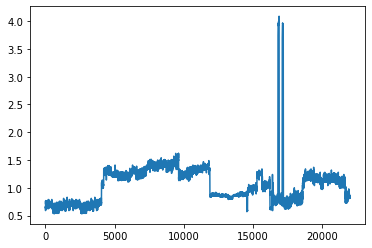

In [57]:
dc.val_correct(df['Current1'],df);

## trying package import


In [62]:
import pandas as pd
import json 
import DataCorrection_pkg as dc

In [63]:
df=pd.read_json('test.json',lines=True)

In [64]:
df.describe()


,Id,Voltage1,Current1,Active_Power1,Power_Factor1,Frequency1,Voltage2,Current2,Active_Power2,Power_Factor2,Frequency2,Voltage3,Current3,Active_Power3,Power_Factor3,Frequency3
count,21978.0,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000
mean,368249.0,277.683837,1.050237,230.704295,0.788244,50.012510,277.683837,1.050237,230.704295,0.788244,50.012510,277.683837,1.050237,230.704295,0.788244,50.012510
std,0.0,7.127780,0.569720,96.082335,0.232547,4.083716,7.127780,0.569720,96.082335,0.232547,4.083716,7.127780,0.569720,96.082335,0.232547,4.083716
min,368249.0,258.750000,0.530000,-1.000000,-32.770000,49.780000,258.750000,0.530000,-1.000000,-32.770000,49.780000,258.750000,0.530000,-1.000000,-32.770000,49.780000
25%,368249.0,273.520000,0.800000,183.000000,0.750000,49.960000,273.520000,0.800000,183.000000,0.750000,49.960000,273.520000,0.800000,183.000000,0.750000,49.960000
50%,368249.0,278.290000,1.080000,234.000000,0.800000,49.990000,278.290000,1.080000,234.000000,0.800000,49.990000,278.290000,1.080000,234.000000,0.800000,49.990000
75%,368249.0,280.440000,1.250000,276.000000,0.820000,50.020000,280.440000,1.250000,276.000000,0.820000,50.020000,280.440000,1.250000,276.000000,0.820000,50.020000
max,368249.0,655.350000,65.540000,1157.000000,1.000000,655.350000,655.350000,65.540000,1157.000000,1.000000,655.350000,655.350000,65.540000,1157.000000,1.000000,655.350000


2255 VALUES CORRECTED!!!


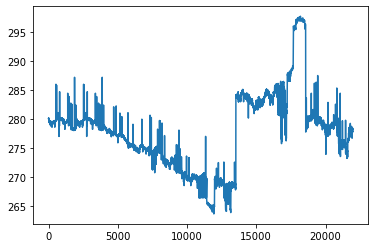

In [65]:
dc.val_correct(df['Voltage1'],df)

173 VALUES CORRECTED!!!


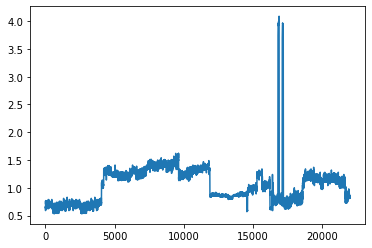

In [67]:
dc.val_correct(df['Current1'],df)

1 VALUES CORRECTED!!!


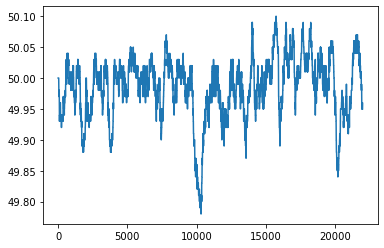

In [203]:
dc.val_correct(df['Frequency1'],df)

1 VALUES CORRECTED!!!


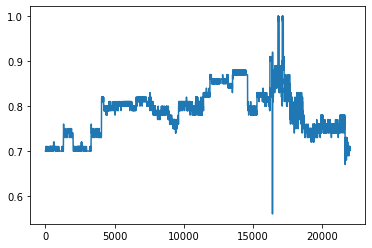

In [69]:
dc.val_correct(df['Power_Factor1'],df)